In [1]:
import numpy as np
import random
import dadi
import pickle
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import data_manip
import ml_models
import plotting
import matplotlib.pyplot as plt

In [2]:
# Load trained ML models to run bootstrap on
list_rfr = pickle.load(open('data/list_rfr_random','rb'))
list_mlpr = pickle.load(open('data/list_mlpr_random','rb'))

In [5]:
# # Generate bootstrap datasets for 2d_splitmig model
# bootstrap_params = []

# while (len(bootstrap_params) < 200):   
#     nu1 = random.random() * 4 - 2
#     nu2 = random.random() * 4 - 2
#     T = random.random() * 1.9 + 0.1
#     m = random.random() * 9 + 1
#     # if (include condition):
#     params = (nu1, nu2, T, m)
#     bootstrap_params.append(params)

# # generate a list of theta values to run scaling and add variance
# theta_list = [10000, 1000, 100]

# # print some info of testing data
# print('n_samples testing: ', len(bootstrap_params))
# print('Range of testing params:', min(bootstrap_params), 'to', 
#         max(bootstrap_params))
# print('Theta list:', theta_list)

# # designate demographic model, sample size, and extrapolation grid 
# func = dadi.Demographics2D.split_mig
# ns = [20,20]
# pts_l = [40, 50, 60]
# logs = [True, True, False, False]

# list_bootstrap_dicts = data_manip.generating_data(bootstrap_params, 
#                         theta_list, func, ns, pts_l, logs, bootstrap=True)
# pickle.dump(list_bootstrap_dicts, open('data/bootstrap_data', 'wb'), 2)

n_samples testing:  200
Range of testing params: (-1.9875214647156922, 1.0174688292813605, 1.1703063654040922, 9.543906779803443) to (1.9989570692480565, 1.3229420483659662, 1.1320118004081323, 8.199539902766718)
Theta list: [10000, 1000, 100]


In [3]:
# Load bootstrap samples: list of 3 dicts for Theta list: [10000, 1000, 100]
# Each dict contain 200 items with the format 
# true_p:[orig_fs,[200 bootstrapped fs from orig_fs]]
list_bootstrap_dicts = pickle.load(open('data/bootstrap_data', 'rb'))

In [5]:
# # Choose one trained model from the list to run bootstrap on
# rfr_1 = list_rfr[0]
# list_pred_dicts_bstr = ml_models.model_bootstrap(rfr_1, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_rfr_1', 'wb'), 2)

In [6]:
# # Choose one trained model from the list to run bootstrap on
# rfr_1000 = list_rfr[2]
# list_pred_dicts_bstr = ml_models.model_bootstrap(rfr_1000, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_rfr_1000', 'wb'), 2)

In [7]:
# # Choose one trained model from the list to run bootstrap on
# mlpr_1 = list_mlpr[0]
# list_pred_dicts_bstr = ml_models.model_bootstrap(mlpr_1, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_mlpr_1', 'wb'), 2)

In [8]:
# # Choose one trained model from the list to run bootstrap on
# mlpr_1000 = list_mlpr[2]
# list_pred_dicts_bstr = ml_models.model_bootstrap(mlpr_1000, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_mlpr_1000', 'wb'), 2)

In [9]:
bstr_rfr_1 = pickle.load(open('results/bootstrap/boostrap_pred_rfr_1', 'rb'))
bstr_rfr_1000 = pickle.load(open('results/bootstrap/boostrap_pred_rfr_1000', 'rb'))
bstr_mlpr_1 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_1', 'rb'))
bstr_mlpr_1000 = pickle.load(open('results/bootstrap/boostrap_pred_mlpr_1000', 'rb'))

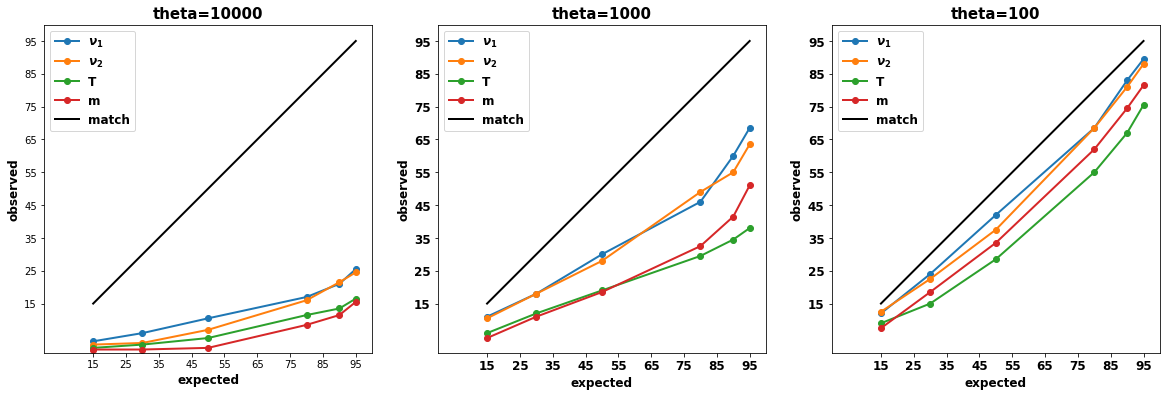

In [10]:
# Plot MLPR_1 bootstrap prediction results: coverage
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

plt.figure(1, figsize=(20,8))
count=1
for bootstrap_pred, theta in zip(bstr_mlpr_1, theta_list):
    plt.figure(1).add_subplot(1, 3, count)
    plotting.plot_coverage(bootstrap_pred, theta, params, expected)
    count+=1

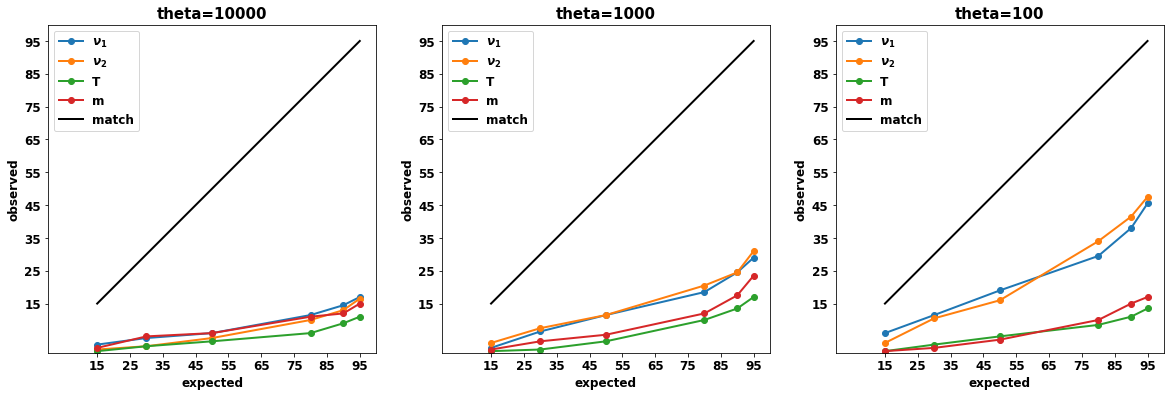

In [18]:
# Plot RFR_1000 bootstrap prediction results: coverage
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
theta_list = [10000, 1000, 100]
expected = [95, 90, 80, 50, 30, 15]

plt.figure(1, figsize=(20,8))
count=1
for bootstrap_pred, theta in zip(bstr_rfr_1000, theta_list):
    plt.figure(1).add_subplot(1, 3, count)
    plotting.plot_coverage(bootstrap_pred, theta, params, expected)
    count+=1

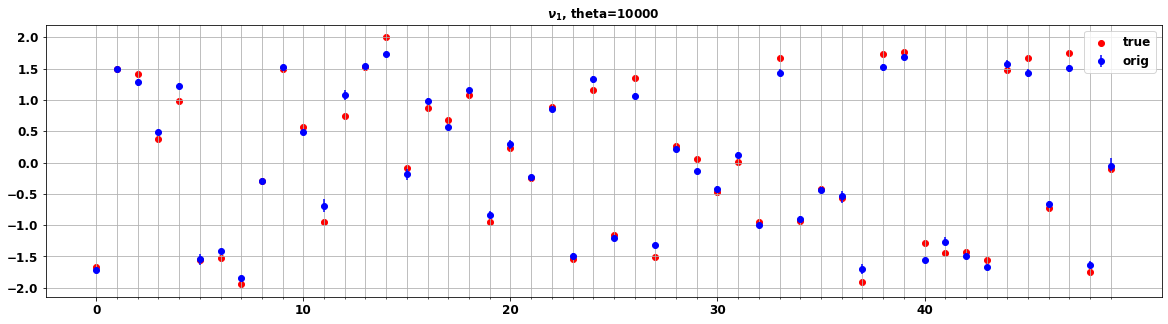

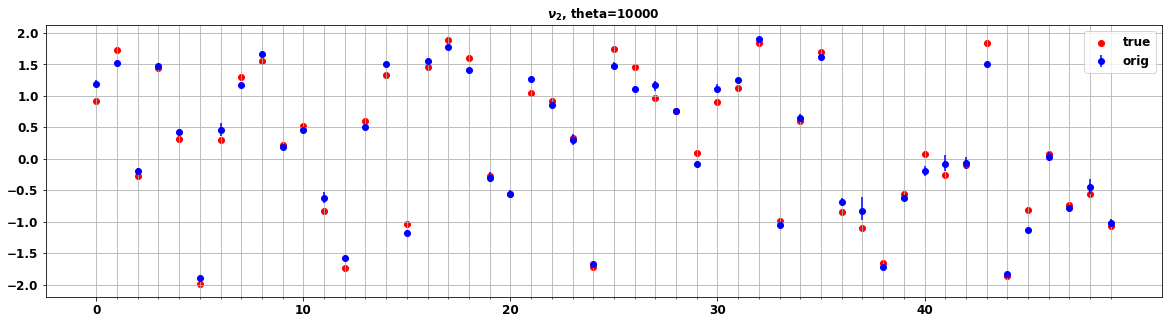

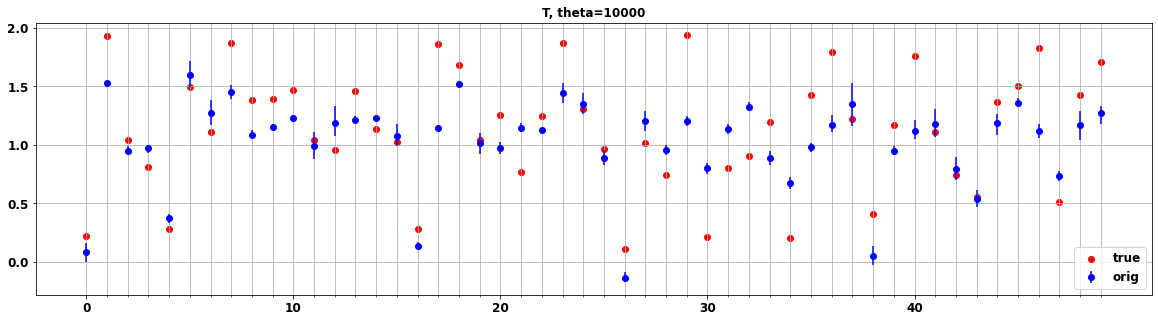

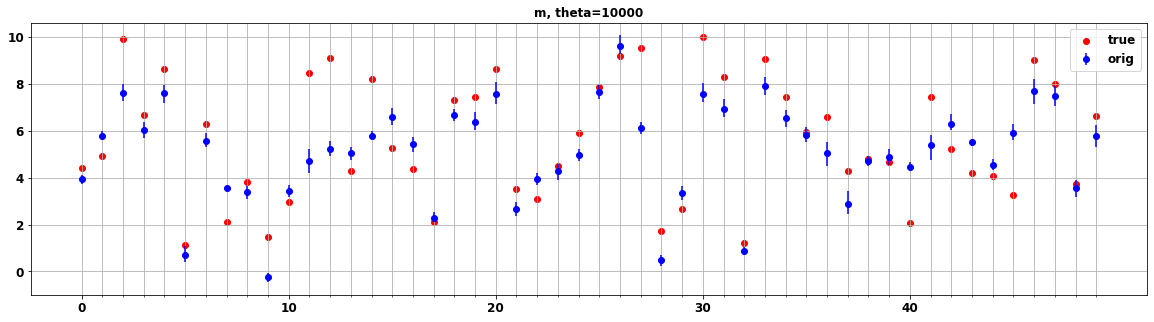

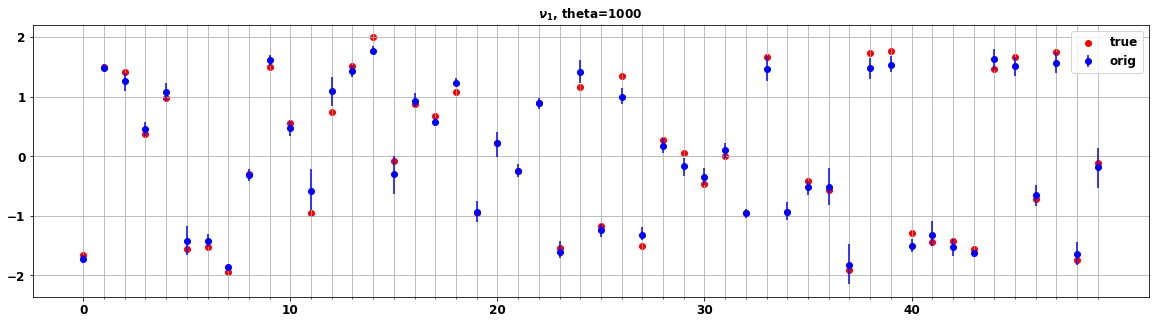

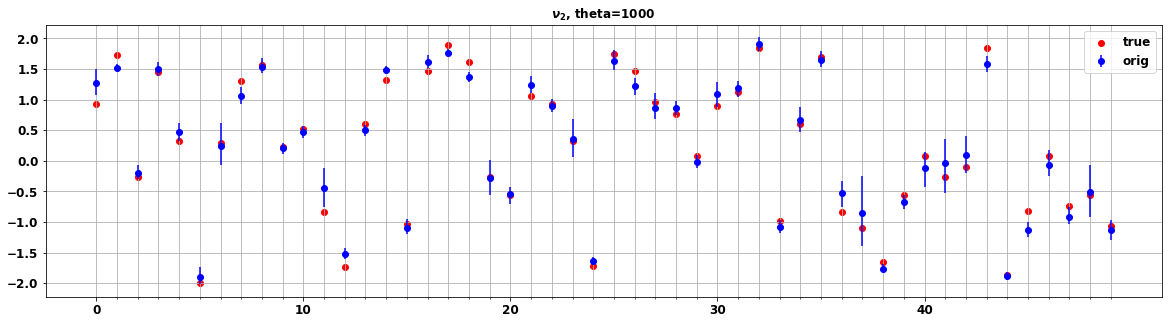

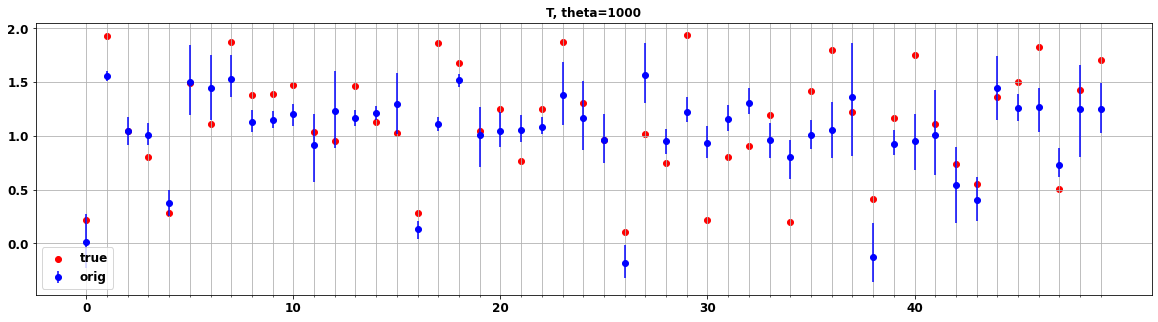

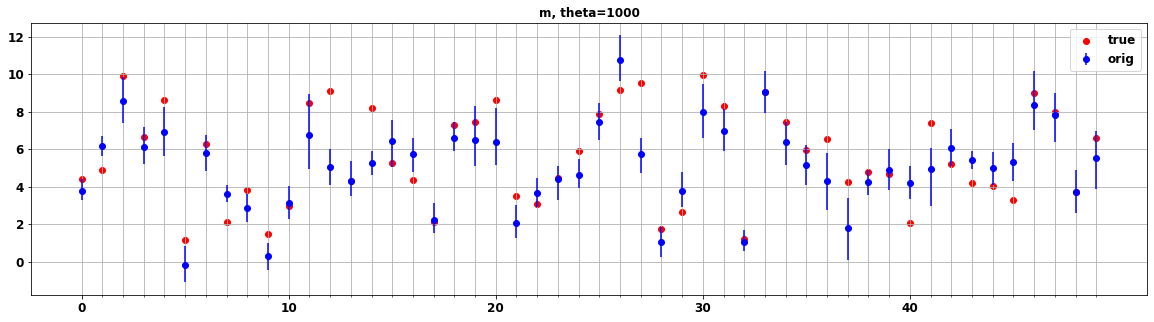

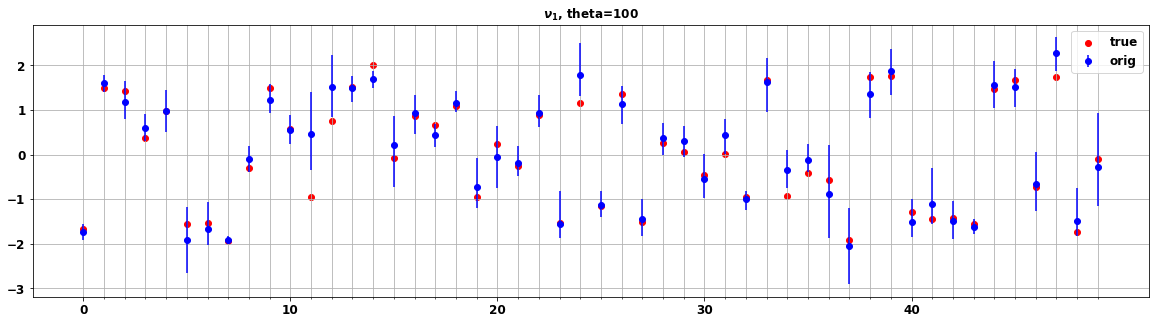

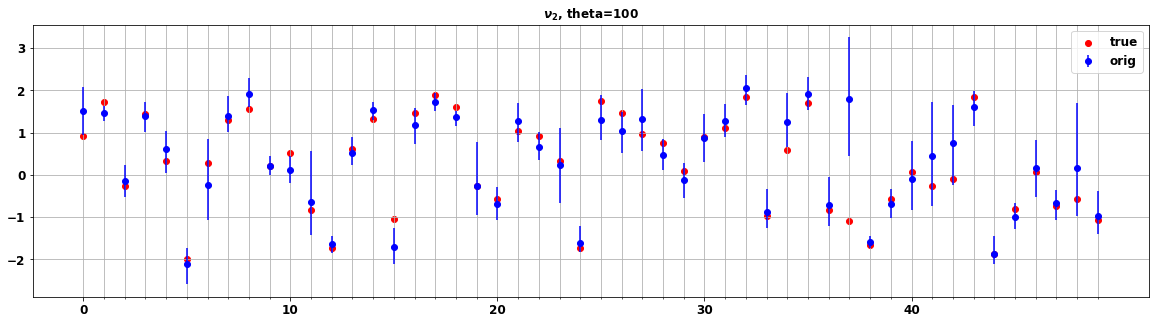

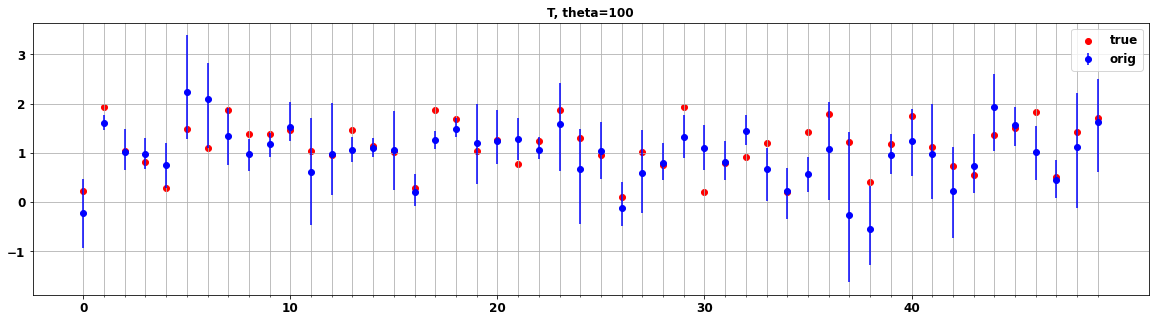

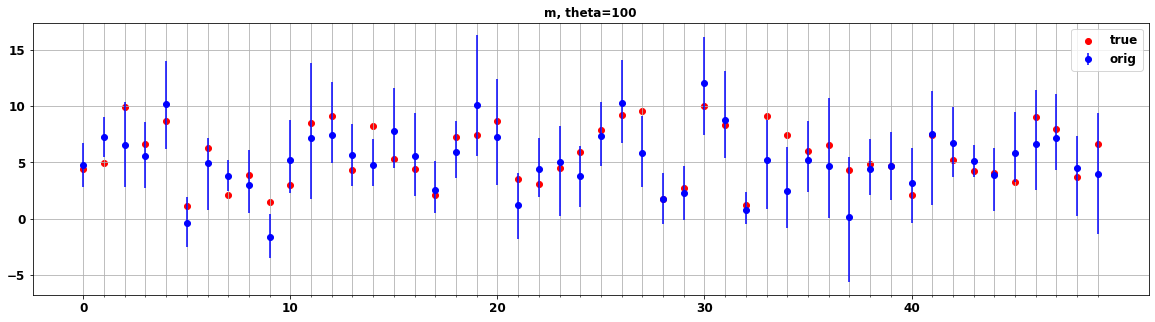

In [16]:
# Plot MLPR_1 bootstrap prediction results: intervals for 50 example data sets
params = [r'$ν_1$', r'$ν_2$', 'T', 'm']
theta_list = [10000, 1000, 100]
for bootstrap_pred, theta in zip(bstr_mlpr_1, theta_list):
    plotting.plot_intervals(bootstrap_pred, theta, params, size=50)